In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
sys.path.append('C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\hdfs')
##### appending the static path to aavoid the error 
# ModuleNotFoundError                       Traceback (most recent call last)
# Input In [9], in <cell line: 3>()
#       2 hdfs_obj_full_name_path = 'C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\\hdfs\\data\\hdfsobj_32_64_no_meta.pkl'
#       3 with open(hdfs_obj_full_name_path, 'rb') as f:
# ----> 4             hdfslogs = pickle.load(f)

# ModuleNotFoundError: No module named 'hdflogv3'
from oclog.BGL.mixed_log import MixedLog, get_embedding_layer
from oclog.hdfs.hdflogv3 import HDFSLogv3
import numpy as np
import pandas as pd
from oclog.openset.opensetv10 import OpenSet
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

In [2]:
bglog = MixedLog(debug=True, 
                 padded_seq_len=32, 
                 padded_char_len=64, 
                 log_meta_status='no_meta',  
                 save_padded_num_sequences=True, 
                 load_from_pkl=False)
# train_test = bglog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=5 )
train_test = bglog.get_tensor_train_val_test(ablation=1000 )
train_data, val_data, test_data = train_test

ablation set to : 1000
log file path found:  True
total number of lines in the log file: 4747963
RAM usage:  39064728
ending logs in memory: 0.8407607078552246
alerts 4747963
unique_alerts: {'WARNING', '0x00544eb8,', 'single', 'Kill', 'SEVERE', 'microseconds', 'INFO', 'FAILURE', 'ERROR', 'FATAL'}
length of list of sequence 148373
elapsed time: 2.3060302734375
len of whole_text_for_training 4747936
character vocabulary 50
len of numseq:  148373
                                                 seq label
0  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
1  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
2  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
3  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
4  [[18, 2, 4, 3, 2, 9, 5, 3, 13, 6, 5, 3, 12, 7,...  INFO
INFO       114115
FATAL       28439
ERROR        4049
WARNING       902
SEVERE        628
Kill          165
FAILURE        75
Name: label, dtype: int64
completed padding sequences in 167.67467498779

In [3]:
#### load the generated bglog and the hdfs log based on param setting the correct file shd be loaded
mlog = MixedLog(debug=True,
                mixed_logs=True,
                load_from_pkl=True,
                save_padded_num_sequences=False, 
                ablation=500, 
                 )
train_test = mlog.get_tensor_train_val_test(ablation=1000)
train_data, val_data, test_data = train_test

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_64_no_meta.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_32_64_no_meta_tk.pkl
found existing hdfs saved object from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\hdfs\data\hdfsobj_32_64_no_meta.pkl
INFO            114115
FATAL            28439
hdfs_anomaly     16838
hdfs_normal      16838
ERROR             4049
WARNING            902
SEVERE             628
Kill               165
FAILURE             75
Name: label, dtype: int64
designated_ukc_cls: FAILURE not matched with current label: INFO
train_INFO:, 800, val_INFO:, 100, test_INFO:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_anomaly
train_hdfs_anomaly:, 800, val_hdfs_anomaly:, 100, test_hdfs_anomaly:, 100
designated_ukc_cls: FAILURE not matched with current label: hdfs_normal
train_hdfs_normal:, 800, val_hdfs_normal:, 100, test_hdfs_normal:, 100
designated_uk

got all the dataset
vocab_size: 50
got all the dataset
2022-04-30 11:35:22.370409
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
150/150 [==============================] - ETA: 0s - loss: 0.5793 - accuracy: 0.7865 - precision: 0.8997 - recall: 0.6894
Epoch 1: val_accuracy improved from -inf to 0.96354, saving model to data\ptmodel_2022-04-30_11_35_22.370409\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-30_11_35_22.370409\assets
150/150 [==============================] - 17s 107ms/step - loss: 0.5793 - accuracy: 0.7865 - precision: 0.8997 - recall: 0.6894 - val_loss: 0.1672 - val_accuracy: 0.9635 - val_precision: 0.9685 - val_recall: 0.9601 - lr: 0.0010
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9719 - precision: 0.9719 - recall: 0.9719
Epoch 2: val_accuracy improved from 0.96354 to 0.99306, saving model to data\ptmodel_2022-04-30_11_35_22.370409\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-30_

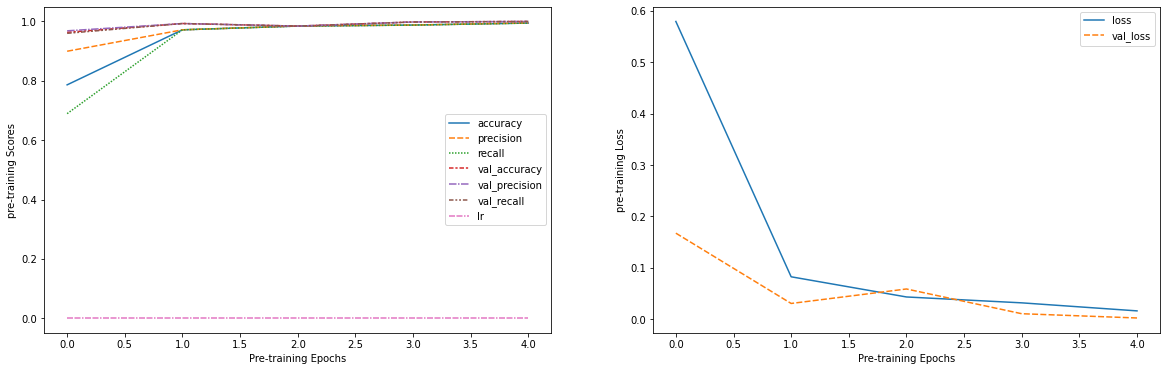

run_id:  2022-04-30_11_36_41.662354_b46a7fb4c84b11ec9121ac8247733f47


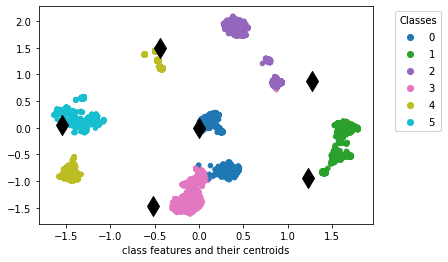

run_id:  2022-04-30_11_37_29.960309_d1342e94c84b11ec8594ac8247733f47


In [4]:
oset = OpenSet()
res = oset.extract_features_and_centroids(bglog=mlog, train_data=train_data, val_data=val_data, test_data=test_data)

In [5]:
# le = preprocessing.LabelEncoder()
# lbl_encoded_cls = le.fit_transform(["tokyo", "tokyo", "paris", "amsterdam"])
# print('original text cls:' , list(le.classes_))
# cls_to_num_map = le.transform(le.classes_)
# print('cls_to_num_map:',cls_to_num_map)
# print('lbl_encoded_cls:', lbl_encoded_cls)
# lbl_decoded_cls = list(le.inverse_transform(lbl_encoded_cls))
# print('lbl_decoded_cls:', lbl_decoded_cls)
# categorical_cls = to_categorical(lbl_encoded_cls)
# print('categorical_cls:', categorical_cls)
# for idx, lbl in enumerate(categorical_cls):
#     categorical_to_labl_encode_item = np.argmax(categorical_cls[idx])
#     print(f'categorical_to_labl_encode_{idx}_item: {categorical_to_labl_encode_item}')
# # le.n_features_in_